# Human Activity Recognition

### Objective
The main objective of this project is to build a model that predicts the human activities such as Walking, Walking Upstairs, Walking Downstairs, Sitting, Standing or Laying.

### Dataset Information
The dataset is collected from 30 volunteers within an age group of 19-48 years wearing a smartphone on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz is captured. Further, the video was recorded to label the data manually.

The sensors (accelerometer and gyroscope) signal were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlabping (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was seperated using a Butterworth Low-Pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequncy domain. <a href="https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones#">[1]</a>

The body linear acceleration and angular velocity were derived in time to obtain jerk signals <strong>(tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ)</strong>.

The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names: <strong>tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag)</strong>.

Frequency domain signals from some of the available signals are obtained applying a Fast Fourier Transform (FFT). These signals objtained were labeled with prefix <strong>'f'</strong> as <strong> fBodyAcc-XYZ, fBodyGyroMag...</strong>

 We will estimate the following properties on each and every signal that we recoreded so far.

* ___mean()___: Mean value
* ___std()___: Standard deviation
* ___mad()___: Median absolute deviation 
* ___max()___: Largest value in array
* ___min()___: Smallest value in array
* ___sma()___: Signal magnitude area
* ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
* ___iqr()___: Interquartile range 
* ___entropy()___: Signal entropy
* ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
* ___correlation()___: correlation coefficient between two signals
* ___maxInds()___: index of the frequency component with largest magnitude
* ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
* ___skewness()___: skewness of the frequency domain signal 
* ___kurtosis()___: kurtosis of the frequency domain signal 
* ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
* ___angle()___: Angle between to vectors.
    

A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen <a href="https://www.youtube.com/watch?v=XOEN9W05_4A">here.</a>

### Label Encodings
* WALKING as 1
* WALKING_UPSTAIRS as 2
* WALKING_DOWNSTAIRS as 3
* SITTING as 4
* STANDING as 5
* LAYING as 6


In [47]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [48]:
# get the features from the file features.txt
features = []
with open('dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print(f"No of Features: {len(features)}")

No of Features: 561


### Obtain the train data

In [52]:
# get the data from txt files to pandas dataframe
X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = pd.DataFrame(data=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('dataset/train/y_train.txt', names=['activity'], squeeze=True)
y_train_labels = y_train.map(
    {
        1 : 'WALKING',
        2 : 'WALKING_UPSTAIRS',
        3 : 'WALKING_DOWNSTAIRS',
        4 : 'SITTING',
        5 : 'STANDING',
        6 : 'LAYING'
    }
)

# combine all columns in single pandas dataframe
train = X_train
train['activity'] = y_train
train['activityName'] = y_train_labels
print(f"The Shape of trainig data is: {train.shape}")
train.sample()

The Shape of trainig data is: (7352, 564)


,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)",subject,activity,activityName
3563,0.207758,-0.008376,-0.098327,0.072484,-0.001096,-0.439179,0.03441,0.006904,-0.432768,0.317535,...,0.901842,0.96063,-0.910077,-0.714805,-0.779622,0.241808,0.069966,17,3,WALKING_DOWNSTAIRS


### Obtain the test data

In [54]:
# get the test data from txt file to pandas dataframe
X_test = pd.read_csv('dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = pd.DataFrame(data=features)

# add subject (person) column to dataframe
X_test['subject'] = pd.read_csv('dataset/test/subject_test.txt', header=None, squeeze=True)

# get labels from txt file
y_test = pd.read_csv('dataset/test/y_test.txt', names=['activity'], squeeze=True)
y_test_labels = y_test.map({
    1 : 'WALKING',
    2 : 'WALKING_UPSTAIRS',
    3 : 'WALKING_DOWNSTAIRS',
    4 : 'SITTING', 
    5 : 'STANDING',
    6 : 'LAYING'
})

# Combine all the columns to a single dataframe
test = X_test
test['activity'] = y_test
test['activityName'] = y_test_labels

print(f"The shape of test data is: {test.shape}")
test.sample()

The shape of test data is: (2947, 564)


,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)",subject,activity,activityName
237,0.228394,-0.0212,-0.159522,-0.399084,0.041624,-0.483794,-0.43486,0.002894,-0.491087,-0.171019,...,0.388568,0.551884,-0.835088,0.653104,-0.644899,0.322766,-0.08146,2,1,WALKING


# Data Cleaning

### 1. Check for Duplicates

In [58]:
print(f"No of duplicates in Train Set: {sum(train.duplicated())}")
print(f"No of duplicates in Test Set: {sum(test.duplicated())}")

No of duplicates in Train Set: 0
No of duplicates in Test Set: 0


### 2. Checking for nan/Null values

In [59]:
print(f"There are {train.isnull().values.sum()} nan/null values in train set")
print(f"There are {test.isnull().values.sum()} nan/null values in test set")

There are 0 nan/null values in train set
There are 0 nan/null values in test set


### 3. Check for data imbalance

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

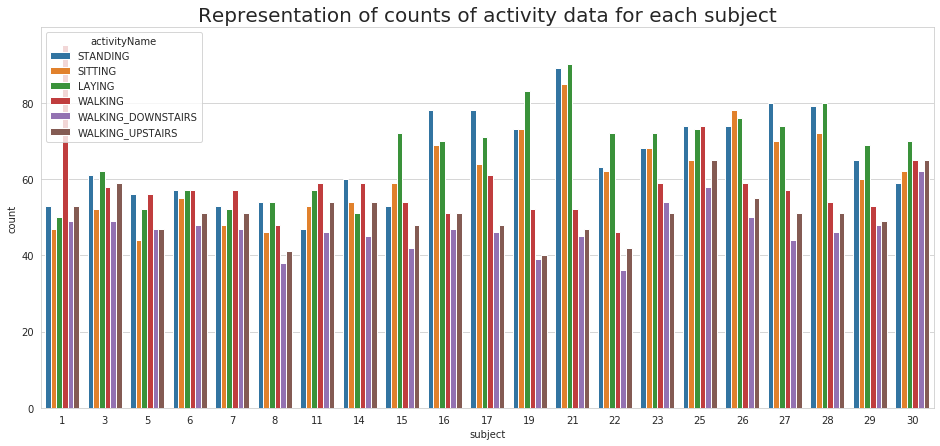

In [73]:
plt.figure(figsize=(16,7))
plt.title("Representation of counts of activity data for each subject", fontsize=20)
sns.countplot(x='subject', hue='activityName', data=train)
plt.show()

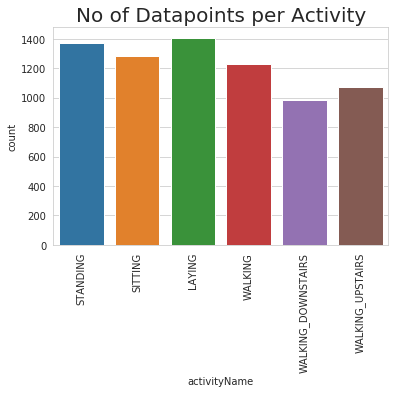

In [76]:
plt.title("No of Datapoints per Activity", fontsize=20)
sns.countplot(train.activityName)
plt.xticks(rotation=90)
plt.show()